# Basic Data Structures

In [15]:
import pandas as pd
import numpy as np

# Series: one-dimensional labaled array holding data of any type
s = pd.Series([1, 3, 5, np.nan, 6, 8])

# DataFrame: A two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns
df2 = pd.DataFrame(
    {
        "A" : 1.0,
        "B" : 2.0,
        "C" : 3.0
    }, index=[0, 3]
)

# Check Data Types
df2.dtypes

# Viewing Data
df2.head()
df2.tail()

# Show indices 
print(df2.index)

# And column names
print(df2.columns)

# Shows a quick statistic summary of data
df2.describe()

# Transpose data, switch indices with columns
df2.T

# Sort by axis
df2.sort_index()

# Sort by values
df2.sort_values(by="B")

Index([0, 3], dtype='int64')
Index(['A', 'B', 'C'], dtype='object')


,A,B,C
0,1.0,2.0,3.0
3,1.0,2.0,3.0


# Selection
## Selection by Label

In [ ]:
import pandas as pd
# Some nice selection methods
# DataFrame.at()
# DataFrame.iat()
# DataFrame.loc()
# DataFrame.iloc()

# .loc: Is location based indexing, uses row and column labels to select data

df1 = pd.DataFrame({
    "A" : 1,
    "B" : 2,
    "C" : 3
}, index = [0, 1])

# Getitem([]), yeilds a Series equivalent 
df1["A"]

# : , selects matching rows
df1[0:3]

# Selection by Label
dates = pd.date_range("20230101", periods=5)
df = pd.DataFrame(np.random.randn(5, 4), index=dates, columns=list("ABCD"))

df.loc[dates[0]]

# Select all rows (:) with a select column labels
df.loc[:, ["A", "B"]]

# Label slicing, both endpoints are included
df.loc["20130101" : "20130104", ["A", "B"]]

# Selecting a single row and column label returns a scalar 
df.loc[dates[0], "A"]

# Getting fast access to a scalar 
df.at[dates[0], "A"]

0.38695712374536845

## Selection by Position

In [39]:
import pandas as pd

# .iloc: Uses integer positions, like list indices to select data

# Select via the position of the passed integers
df.iloc[3]

# Integers slice acts similiar to NumPy/Python
df.iloc[3:5, 0:2]

# List of integer positons
df.iloc[[1, 2, 4], [0, 2]]

# For slicing rows explicitly
df.iloc[1:3, :]

# For slicing columns explicitly 
df.iloc[:, 1:3]

# For getting a value explicitly 
df.iloc[1, 1]

-0.17276827962231237

## Boolean Indexing

In [49]:
import pandas as pd

df5 = pd.DataFrame({
    "A" : [1, 2, 3, 4, 5],
    "B" : [2, 4, 10, 11, 112]
}, index=[0, 1, 2, 3, 4])

df5.head()

# Select rows where df.A is greater than 0
df5[df5["A"] > 0]

# Selecting values from a DataFrame where a boolean condition is met
df5[df5 > 0]

# Using isin() method for filtering 
df6 = df5
df6["E"] = ["one", "two", "three", "four", "five"]

df6[df6["E"].isin(["two", "four"])]

,A,B,E
1,2,4,two
3,4,11,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [53]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by position
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2023-01-01,0.386957,0.000000,-0.548037,5.0,NaN
2023-01-02,-1.114890,-0.172768,-0.461966,5.0,NaN
2023-01-03,-1.155979,-0.991399,-1.518681,5.0,NaN
2023-01-04,-1.165529,-0.312230,-0.492442,5.0,NaN
2023-01-05,0.142538,-0.454912,-0.238486,5.0,NaN


## Missing Data

In [64]:
import pandas as pd

# np.nan: Represents missing data

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

# DataFrame.dropna(): Drops any rows that have missing data
df1.dropna(how="any")

# DataFrame.fillna(): Fills missing data
df1.fillna(value=5)

# isna(): Gets the boolean mask where the values are nan
pd.isna(df1)

,A,B,C,D,F,E
2023-01-01,False,False,False,False,True,False
2023-01-02,False,False,False,False,True,False
2023-01-03,False,False,False,False,True,True
2023-01-04,False,False,False,False,True,True


# Operations

In [68]:
import pandas as pd

df10 = pd.DataFrame({
    "A" : 1,
    "B" : 2,
    "C" : 3,
}, index=[0, 1, 3])

# Calculate mean for 10 column
print(df10.mean())

# Calculate mean for each row
df10.mean(axis=1)

A    1.0
B    2.0
C    3.0
dtype: float64


0    2.0
1    2.0
3    2.0
dtype: float64

## User Defined Functions


In [70]:
import pandas as pd
import numpy as np

# Applies a user defined function that reduces or broadcasts its results respectively
# DataFrame.agg()
# DataFrame.transform()
df.agg(lambda x: np.mean(x) * 5.6)
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2023-01-01,39.160061,0.000000,-55.461343,506.0,NaN
2023-01-02,-112.826858,-17.484150,-46.751000,506.0,NaN
2023-01-03,-116.985122,-100.329605,-153.690531,506.0,NaN
2023-01-04,-117.951487,-31.597642,-49.835118,506.0,NaN
2023-01-05,14.424884,-46.037078,-24.134757,506.0,NaN


## Value Counts

In [72]:
import pandas as pd
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

5    3
4    2
1    2
2    1
3    1
0    1
Name: count, dtype: int64

## String Methods

In [73]:
import pandas as pd
# Series is equipped with a set of string processing methods in the str attribute that make it easy
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge 
## Concat

In [77]:
import pandas as pd

# Concatenating pandas objects together row-wise with concat 
df = pd.DataFrame(np.random.randn(10 , 4))
df

# Break it into pieces 
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-1.610363,-0.710967,0.641257,-0.022857
1,-0.779675,0.035456,-0.083835,0.676822
2,-2.214403,0.599480,-0.724972,-0.626956
3,-0.064860,-0.770053,-0.077865,0.528528
4,-0.633586,-0.103873,0.301382,0.161606
5,0.196069,1.618039,1.839907,-0.775770
6,0.698331,0.886366,-0.581639,0.343504
7,0.233902,1.352167,0.809850,-0.505053
8,-0.161557,-1.025454,-0.240885,0.446278
9,0.968834,1.610105,0.391645,-0.008823


## Join

In [ ]:
import pandas as pd
# merge(): Enables SQL style join types along a specific columns 
left = pd.DataFrame({
    "key" : ["foo", "foo"], 
    "lval" : [1, 2]
})

right = pd.DataFrame({
    "key" : ["foo", "foo"], 
    "rval" : [1, 2]
}) 

pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,1
1,foo,1,2
2,foo,2,1
3,foo,2,2


## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [82]:
import pandas as pd

df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df
df.groupby("A")[["C", "D"]].sum()

# Grouping by multiple columns label forms MultiIndex.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.160179 -0.882808
    three  1.950200  0.734563
    two   -0.410118  0.845656
foo one    0.754399  2.981969
    three -1.904933 -0.385532
    two    0.650582  1.711654

## Pivot Tables

In [83]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -2.610082  0.842487
      B -0.773943  0.799446
      C -1.627834 -1.159245
three A  0.074585       NaN
      B       NaN -0.209543
      C -0.370437       NaN
two   A       NaN -1.206995
      B -0.263471       NaN
      C       NaN -0.517758

## Time Series

In [85]:
import pandas as pd
import numpy as np

rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5min").sum()

2012-01-01    22502
Freq: 5min, dtype: int32

## Categoricals

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

# Converting the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

# Rename the categories to more meaningful names:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

## Plotting

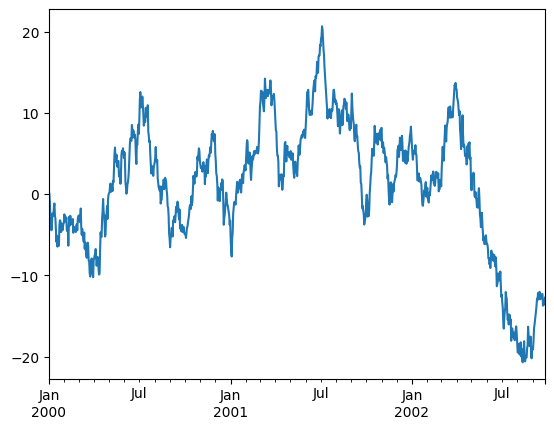

<Figure size 640x480 with 0 Axes>

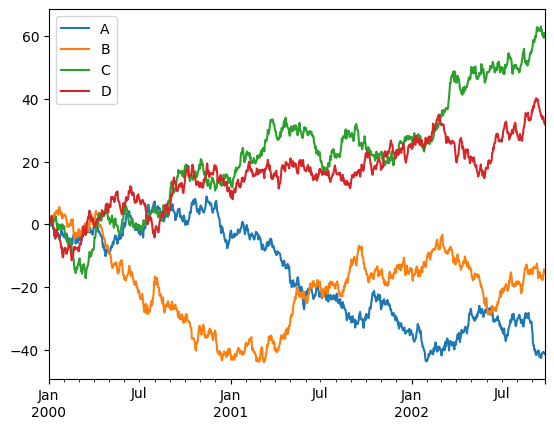

In [90]:
import matplotlib.pyplot as plt

# Used to close a figure window
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
) 

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')